In [1]:
import pandas as pd
import pyreadstat
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

import econtools as econ
import econtools.metrics as mt
import math

In [2]:
df, meta = pyreadstat.read_sav("C:/Users/thxkn/OneDrive/바탕 화면/CV/박사지원서류/WS_HJ/KEEP/df.sav")

In [3]:
df.head()

,BYSID,BYHID,GENDER,BYSCLASS,region,typeofschool,F2S01004,F2S01005,F2S01006,F2S01007,...,F3H12023,F3H12024,F3H12025,F3H12026,F3H12027,F3H13001,F3H13002,F3H13003,F3H13004,income_rank_p
0,1003.0,10031.0,1.0,1.0,8.0,2.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.547619
1,1005.0,10051.0,1.0,1.0,15.0,2.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.380952
2,1007.0,10071.0,1.0,1.0,2.0,2.0,2.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.511905
3,1008.0,10081.0,1.0,1.0,8.0,2.0,2.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.452381
4,1010.0,10101.0,1.0,1.0,8.0,2.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.583333


In [4]:
#goal list
goal_list = ['learning', 'betterperson', 'betterjob', 'futurework', 'forsociety', 'favorablejudg',  'popular',  'competition', 'forced', 'negativejudg',  'penalty']

In [5]:
df[goal_list]

,learning,betterperson,betterjob,futurework,forsociety,favorablejudg,popular,competition,forced,negativejudg,penalty
0,3.0,4.0,5.0,5.0,4.0,4.0,3.0,3.0,3.0,2.0,1.0
1,3.0,4.0,4.0,4.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0
2,3.0,4.0,4.0,4.0,3.0,3.0,2.0,2.0,2.0,3.0,1.0
3,2.0,5.0,5.0,5.0,3.0,4.0,2.0,3.0,1.0,3.0,1.0
4,3.0,4.0,4.0,4.0,3.0,2.0,2.0,4.0,3.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3839,3.0,4.0,5.0,5.0,4.0,3.0,2.0,4.0,2.0,3.0,1.0
3840,2.0,4.0,4.0,3.0,3.0,2.0,1.0,2.0,5.0,2.0,5.0
3841,3.0,4.0,4.0,5.0,3.0,3.0,2.0,2.0,4.0,2.0,2.0
3842,3.0,5.0,5.0,5.0,3.0,2.0,2.0,1.0,1.0,3.0,3.0


In [6]:
#mastery perf both are significant
#df['perfshare'] = df['negativejudg']+df['competition']/df['learning']+ df['betterperson']+df['negativejudg']+df['competition']
df['perf'] = df['negativejudg']+df['competition']
df['perfshare'] = df['negativejudg']+df['competition']/df['learning']+ df['betterperson']+df['negativejudg']+df['competition']

y = df['perfshare']
x = df['income_rank_p']

exog = ['income_rank_p', 'region', 'typeofschool', 'GENDER', 'year']
print(mt.reg(df, 'perfshare', exog))
print(np.corrcoef(x,y))

Dependent variable:	perfshare
N:			3844
R-squared:		0.0111
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se      t   p>t CI_low CI_high
income_rank_p  0.644 0.271  2.379 0.017  0.113   1.175
region         0.007 0.012  0.643 0.520 -0.015   0.030
typeofschool   0.047 0.020  2.366 0.018  0.008   0.086
GENDER        -0.571 0.108 -5.303 0.000 -0.782  -0.360
year           0.006 0.000 73.011 0.000  0.006   0.006

[[1.         0.04426019]
 [0.04426019 1.        ]]


In [7]:
df['mastery'] = df['learning'] + df['betterperson']
df['masteryshare'] = df['mastery'] / df['negativejudg'] + df['mastery']+ df['competition']
y = df['masteryshare']
x = df['income_rank_p']

exog = ['income_rank_p', 'region', 'typeofschool', 'GENDER', 'year']
print(mt.reg(df, 'masteryshare', exog))
print(np.corrcoef(x,y))

Dependent variable:	masteryshare
N:			3844
R-squared:		0.0129
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se      t   p>t CI_low CI_high
income_rank_p  1.006 0.221  4.563 0.000  0.574   1.439
region        -0.012 0.010 -1.234 0.217 -0.030   0.007
typeofschool   0.012 0.016  0.749 0.454 -0.020   0.044
GENDER        -0.421 0.088 -4.800 0.000 -0.593  -0.249
year           0.006 0.000 88.103 0.000  0.006   0.006

[[1.         0.08045323]
 [0.08045323 1.        ]]


<h2>Achievement Goal Proxy</h2>

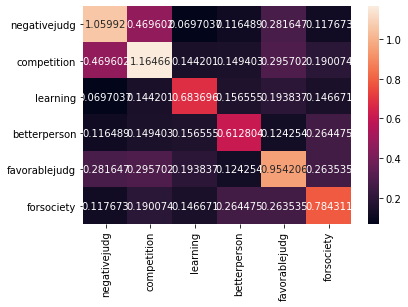

In [21]:
df3 = df[df['year']==2003]
goal_array = np.array([df3['negativejudg'],df3['competition'],df3['learning'],df3['betterperson'],df3['favorablejudg'],df3['forsociety']])

cov = np.cov(goal_array , bias = True)
goals = ['negativejudg','competition','learning','betterperson','favorablejudg','forsociety']

sns.heatmap(cov, annot = True, fmt= 'g', xticklabels = goals, yticklabels=goals )
plt.show()

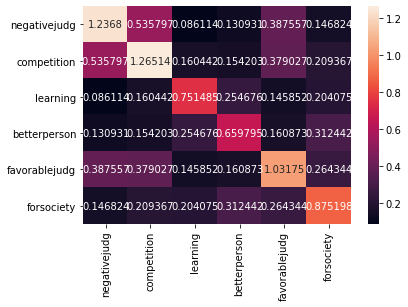

In [22]:
df4 = df[df['year']==2004]
goal_array = np.array([df4['negativejudg'],df4['competition'],df4['learning'],df4['betterperson'],df4['favorablejudg'],df4['forsociety']])

cov = np.cov(goal_array , bias = True)
goals = ['negativejudg','competition','learning','betterperson','favorablejudg','forsociety']

sns.heatmap(cov, annot = True, fmt= 'g', xticklabels = goals, yticklabels=goals )
plt.show()

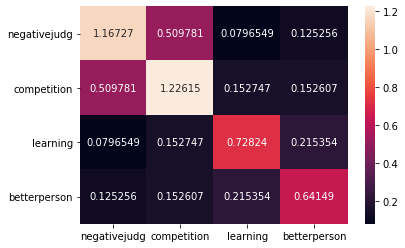

In [91]:
goal_array = np.array([df['negativejudg'],df['competition'],df['learning'],df['betterperson']])
cov = np.cov(goal_array , bias = True)
goals = ['negativejudg','competition','learning','betterperson'] #,'favorablejudg','forsociety']

htmap = sns.heatmap(cov, annot = True, fmt= 'g', xticklabels = goals, yticklabels=goals )
plt.show()

In [92]:
figure = htmap.get_figure()    
figure.savefig('goals_heatmap.png', dpi=400)

In [94]:
##### linear combination ###### - works well
var_neg = np.var(df['negativejudg'])
var_comp = np.var(df['competition'])
var_learn = np.var(df['learning'])
var_bp = np.var(df['betterperson'])

df['comb_perf'] = (var_neg*df['negativejudg'] + var_comp*df['competition']) / (var_neg + var_comp)
df['comb_mastery'] =(var_learn*df['learning'] + var_bp*df['betterperson']) / (var_learn + var_bp)
df['comb_perfshare']= df['comb_perf']/ (df['comb_mastery'] + df['comb_perf'])
df['comb_masteryshare'] = 1-df['comb_perfshare']

<h3> Achievement Goal Proxy - asymptotically normal </h3>

In [64]:
from scipy import stats
import math #math.log
from autograd import grad, jacobian
from sympy import Matrix, log

In [67]:
perf = np.array([df['negativejudg'],df['competition']])
perf_func =  np.log(perf[0]*perf[1])
# standard error
j_perf = jacobian(perf_func)
cov = np.cov(perf , bias = True)

In [68]:
alpha = 0.05
a,b  = stats.kstest(perf_func, 'norm')

In [71]:
if b < alpha: 
        print("the null hypothesis can be rejected")
else:
    print("the null hypothesis cannot be rejected")

the null hypothesis can be rejected


In [81]:
jacobian(perf_func)(np.array([perf]))

TypeError: 'numpy.ndarray' object is not callable

In [62]:
#se = cov.dot(j_perf.transpose())
X = Matrix(sympy.log(df['negativejudg']*df['competition']))
Y = Matrix(perf)
X.jacobian(Y)

Matrix([
[2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 4.0, 4.0, 4.0, 4.0, 2.0, 4.0, 3.0, 3.0, 2.0, 4.0, 2.0, 3.0, 2.0, 2.0, 4.0, 2.0, 2.0, 3.0, 2.0, 4.0, 2.0, 3.0, 2.0, 2.0, 1.0, 1.0, 3.0, 2.0, 2.0, 1.0, 3.0, 4.0, 4.0, 3.0, 2.0, 2.0, 2.0, 3.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 4.0, 5.0, 5.0, 1.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 2.0, 2.0, 4.0, 2.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 2.0, 3.0, 2.0, 1.0, 3.0, 4.0, 2.0, 1.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.0, 2.0, 2.0, 1.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 2.0, 4.0, 1.0, 4.0, 3.0, 2.0, 3.0, 3.0, 2.0, 4.0, 3.0, 2.0, 3.0, 3.0, 2.0, 1.0, 4.0, 3.0, 1.0, 3.0, 2.0, 2.0, 3.0, 2.0, 3.0, 4.0, 4.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 1.0, 2.0, 4.0, 1.0, 4.0, 1.0, 4.0, 3.0, 2.0, 3.0, 2.0, 1.0, 3.0, 1.0, 2.0, 4.0, 4.0, 3.0, 2.0, 4.0, 1.0, 3.0, 5.0, 1.0, 3.0, 2.0, 3.0, 2.0, 2.0, 4.0, 2.0, 2.0, 1.0, 2.0, 2.0, 3.0, 2.0, 1.0, 2.0, 1.0, 2.0, 2.0, 2.0, 4.0, 3.0, 1.0, 4.0, 2.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 2.0, 2.0, 

In [25]:
# Kolmogorov-Smirnov test
#H0: Fs(x) is equal to Ft(x) for all x from -inf. to inf.
#HA: Fs(x) is not equal to Ft(x) for at least one x

alpha = 0.05
for i in goals:
    print(i)
    a,b  = stats.kstest(df[i], 'norm')
    print('Statistics', a, 'p-value',b)
    if b < alpha: 
        print("the null hypothesis can be rejected")
    else:
        print("the null hypothesis cannot be rejected")

negativejudg
Statistics 0.8413447460685429 p-value 0.0
the null hypothesis can be rejected
competition
Statistics 0.8413447460685429 p-value 0.0
the null hypothesis can be rejected
learning
Statistics 0.9280823342328822 p-value 0.0
the null hypothesis can be rejected
betterperson
Statistics 0.9652831666990632 p-value 0.0
the null hypothesis can be rejected
favorablejudg
Statistics 0.8679886817875128 p-value 0.0
the null hypothesis can be rejected
forsociety
Statistics 0.9559179221621226 p-value 0.0
the null hypothesis can be rejected


In [27]:
#D’Agostino’s K-squared test
#H0= The sample comes from a normal distribution.
#HA=The sample is not coming from normal distribution

alpha = 0.05
for i in goals:
    print(i)
    a,b  = stats.normaltest(df[i])
    print('Statistics', a, 'p-value',b)
    if b < alpha: 
        print("the null hypothesis can be rejected")
    else:
        print("the null hypothesis cannot be rejected")

negativejudg
Statistics 251.47275715599415 p-value 2.4739140614251536e-55
the null hypothesis can be rejected
competition
Statistics 295.18031813635974 p-value 7.987453327012754e-65
the null hypothesis can be rejected
learning
Statistics 7.09258691243182 p-value 0.02883130634906772
the null hypothesis can be rejected
betterperson
Statistics 417.50292891355815 p-value 2.1897316578943712e-91
the null hypothesis can be rejected
favorablejudg
Statistics 75.17010575386718 p-value 4.753559491129449e-17
the null hypothesis can be rejected
forsociety
Statistics 57.701360098270335 p-value 2.953308773038629e-13
the null hypothesis can be rejected


<h2>Main Analysis</h2>

In [96]:
#############################################
#완전 박제: 음수가 나왔어ㅠㅠㅠcomb_perfshare
############################################
y = df['comb_perf']
x = df['income_rank_p']

exog = ['income_rank_p', 'region', 'typeofschool', 'GENDER', 'year']
print(mt.reg(df, 'comb_perf', exog))
print(np.corrcoef(x,y))

y = df['comb_perfshare']
x = df['income_rank_p']

exog = ['income_rank_p', 'region', 'typeofschool', 'GENDER', 'year']
print(mt.reg(df, 'comb_perfshare', exog))
print(np.corrcoef(x,y))

Dependent variable:	comb_perf
N:			3844
R-squared:		0.0096
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se      t   p>t CI_low CI_high
income_rank_p  0.102 0.075  1.356 0.175 -0.045   0.249
region         0.002 0.003  0.677 0.498 -0.004   0.009
typeofschool   0.011 0.006  2.003 0.045  0.000   0.022
GENDER        -0.160 0.030 -5.353 0.000 -0.218  -0.101
year           0.001 0.000 55.179 0.000  0.001   0.001

[[1.         0.02617499]
 [0.02617499 1.        ]]
Dependent variable:	comb_perfshare
N:			3844
R-squared:		0.0023
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se      t   p>t CI_low CI_high
income_rank_p -0.021 0.008 -2.657 0.008 -0.036  -0.005
region         0.000 0.000  0.706 0.480 -0.000   0.001
typeofschool   0.000 0.001  0.556 0.578 -0.001   0.001
GENDER        -0.002 0.003 -0.796 0.426 -0.009   0.004
year           0.000 0.000 89.745 0.000  0.000   0.000

[[ 1.         -0.04444064]
 [-0.04444064  1.        ]]

In [86]:
y = df['comb_mastery']
x = df['income_rank_p']

exog = ['income_rank_p', 'region', 'typeofschool', 'GENDER', 'year']
print(mt.reg(df, 'comb_mastery', exog))
print(np.corrcoef(x,y))

y = df['comb_masteryshare']
x = df['income_rank_p']

exog = ['income_rank_p', 'region', 'typeofschool', 'GENDER', 'year']
print(mt.reg(df, 'comb_masteryshare', exog))
print(np.corrcoef(x,y))

Dependent variable:	comb_mastery
N:			3844
R-squared:		0.0387
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se       t   p>t CI_low CI_high
income_rank_p  0.712 0.101   7.035 0.000  0.514   0.911
region         0.001 0.004   0.159 0.873 -0.008   0.009
typeofschool   0.020 0.007   2.633 0.009  0.005   0.034
GENDER        -0.373 0.040  -9.265 0.000 -0.452  -0.294
year           0.003 0.000 103.941 0.000  0.003   0.003

[[1.         0.12126245]
 [0.12126245 1.        ]]
Dependent variable:	comb_masteryshare
N:			3844
R-squared:		0.0025
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se      t   p>t CI_low CI_high
income_rank_p  0.073 0.026  2.806 0.005  0.022   0.124
region        -0.001 0.001 -0.668 0.504 -0.003   0.001
typeofschool  -0.001 0.002 -0.359 0.720 -0.004   0.003
GENDER        -0.009 0.010 -0.855 0.393 -0.029   0.011
year          -0.000 0.000 -0.776 0.438 -0.000   0.000

[[1.         0.04722301]
 [0.04722301 1.  

In [39]:
np.corrcoef(df.loc[df['year']==2003, 'perf'],df.loc[df['year']==2003,'income_rank_p'])

array([[1.        , 0.05667437],
       [0.05667437, 1.        ]])

In [74]:
df['mastery'] = df['learning'] + df['betterperson']
df['masteryshare'] = df['mastery'] / (df['favorablejudg']+df['negativejudg'] + df['mastery']+ df['competition'])

In [75]:
np.corrcoef(df['negativejudg'], df['competition'])

array([[1.        , 0.42611332],
       [0.42611332, 1.        ]])

In [76]:
np.var(df['learning'])

0.7282398018019854

In [77]:
y = df['masteryshare']
x = df['income_rank_p']

exog = ['income_rank_p', 'region', 'typeofschool', 'GENDER', 'year']
print(mt.reg(df, 'masteryshare', exog))
print(np.corrcoef(x,y))

Dependent variable:	masteryshare
N:			3844
R-squared:		0.0193
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se      t   p>t CI_low CI_high
income_rank_p  1.041 0.230  4.522 0.000  0.590   1.492
region         0.009 0.010  0.893 0.372 -0.011   0.028
typeofschool   0.070 0.017  4.131 0.000  0.037   0.104
GENDER        -0.478 0.092 -5.223 0.000 -0.657  -0.299
year           0.007 0.000 98.214 0.000  0.007   0.007

[[1.         0.08403793]
 [0.08403793 1.        ]]


In [78]:
df['perf'] = df['favorablejudg']+df['negativejudg']+df['competition']
df['pefshare'] = df['perf'] / df['perf'] + df['learning'] + df['betterperson']

y = df['pefshare']
x = df['income_rank_p']

exog = ['income_rank_p', 'region', 'typeofschool', 'GENDER', 'year']
print(mt.reg(df, 'perfshare', exog))
print(np.corrcoef(x,y))

Dependent variable:	perfshare
N:			3844
R-squared:		0.0035
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se      t   p>t CI_low CI_high
income_rank_p  0.095 0.125  0.759 0.448 -0.150   0.340
region         0.005 0.005  0.931 0.352 -0.006   0.016
typeofschool   0.022 0.009  2.401 0.016  0.004   0.040
GENDER        -0.111 0.050 -2.242 0.025 -0.209  -0.014
year           0.002 0.000 44.546 0.000  0.002   0.002

[[1.         0.12128711]
 [0.12128711 1.        ]]
